In [9]:
#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기
df=pd.read_csv('auto-mpg.csv', header = 0, engine = 'python')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [33]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name']

In [35]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [37]:
df.shape

(398, 9)

In [39]:
df.info() #df의 정보 확인 horsepower 과 name 이 object 여서 바꿔줘야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [41]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [43]:
for i in df.columns:
    print(df[i].unique())
    print()

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[8 4 6 3 5]

[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  

In [51]:
for i in df.columns:
    if "?"in df[i].unique():
        print(i,"에는 '?' 결측치가 포함되어 있어요!")
        print("===")
print("검사 끄읏-!")

horsepower 에는 '?' 결측치가 포함되어 있어요!
===
검사 끄읏-!


In [61]:
df.horsepower.replace("?",np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8544\1815721611.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.horsepower.replace("?",np.nan, inplace=True)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [25]:
from statsmodels.formula.api import ols, glm

In [63]:
tmp_horsepower = df.horsepower.dropna(axis=0)

In [65]:
df.shape

(398, 9)

In [67]:
tmp_horsepower.shape

(392,)

In [69]:
tmp_horsepower.astype("float").describe().to_frame()

,horsepower
count,392.000000
mean,104.469388
std,38.491160
min,46.000000
25%,75.000000
50%,93.500000
75%,126.000000
max,230.000000


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8544\331439681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[['horsepower']])


<Axes: ylabel='Density'>

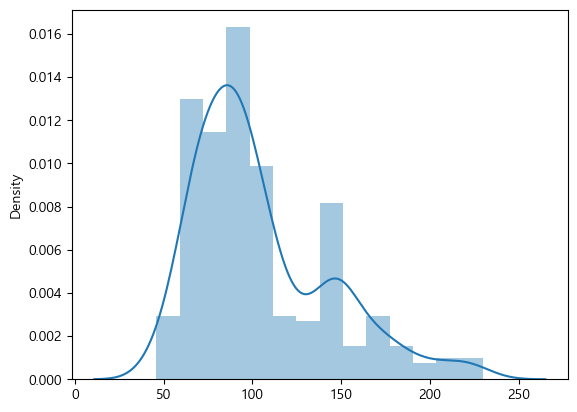

In [71]:
sns.distplot(df[['horsepower']])

In [73]:
( df.horsepower.isnull().sum() / df.shape[0] ) *100

1.507537688442211

In [75]:
df.dropna(subset=["horsepower"], axis=0,inplace=True)

In [77]:
df.shape

(392, 9)

In [81]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


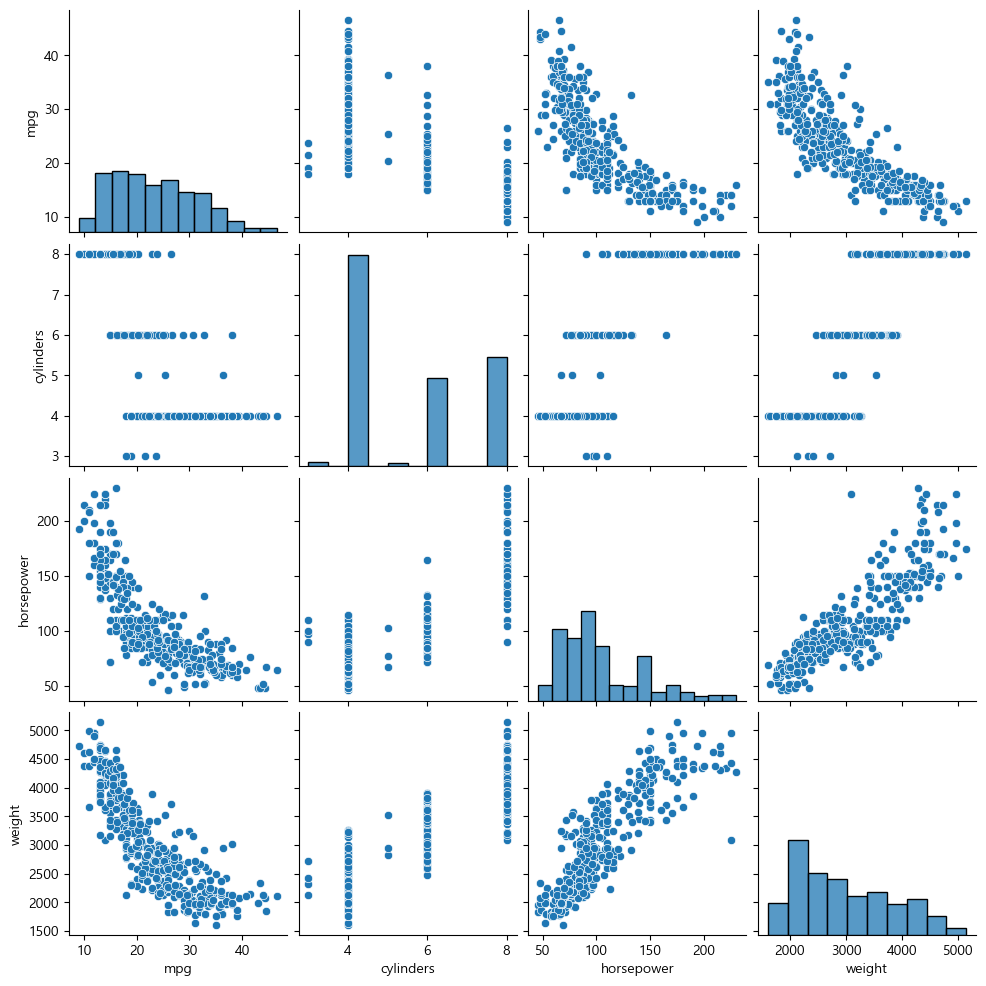

In [83]:
sns.pairplot(ndf)

<Axes: xlabel='cylinders', ylabel='mpg'>

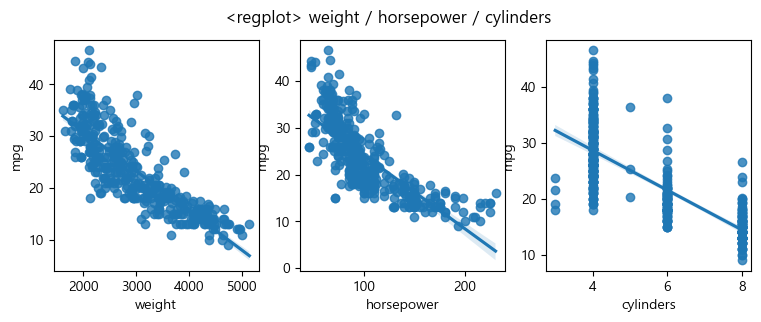

In [85]:
# jointplot
fig = plt.figure(figsize=(9, 3))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

plt.suptitle("<regplot> weight / horsepower / cylinders ")

sns.regplot(data=ndf, x="weight", y="mpg", ax=ax1)
sns.regplot(data=ndf, x="horsepower", y="mpg", ax=ax2)
sns.regplot(data=ndf, x="cylinders", y="mpg", ax=ax3)

In [87]:
from statsmodels.formula.api import ols, glm

In [89]:
Rformula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year + origin'

In [91]:
regression_result = ols(Rformula, data = df).fit()

In [93]:
regression_result.summary()
#결과를 보면 acceleration,horsepower,cylinder 세가지는 mpg와 유의미하지않다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          2.04e-139
Time:                        18:10:09   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
model_year       0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
import statsmodels.api as sm

In [105]:
others = list(set(df.columns).difference(set(["mpg", "horsepower"])))

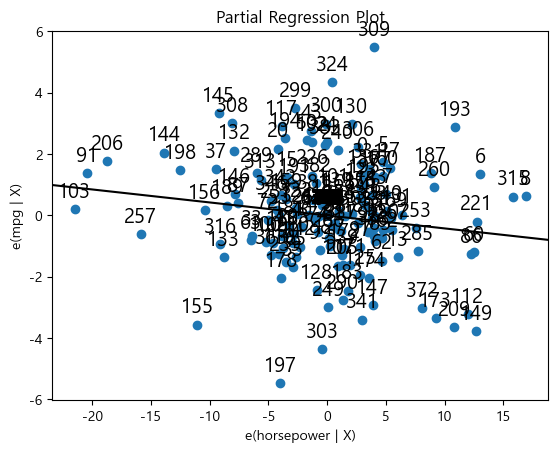

In [107]:
# 연비와 마력간의 부분플롯회귀분석
p, resids = sm.graphics.plot_partregress("mpg", "horsepower", 
                                         others, data = df, ret_coords = True)

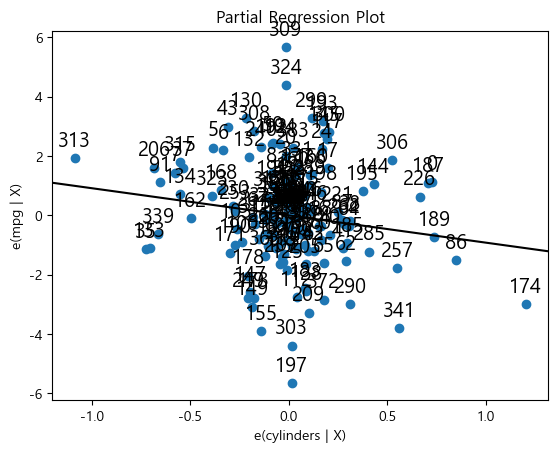

In [109]:
# 연비와 실린더수 간의 부분플롯회귀분석
others = list(set(df.columns).difference(set(["mpg", "cylinders"])))
p, resids = sm.graphics.plot_partregress("mpg", "cylinders", 
                                         others, data = df, ret_coords = True)

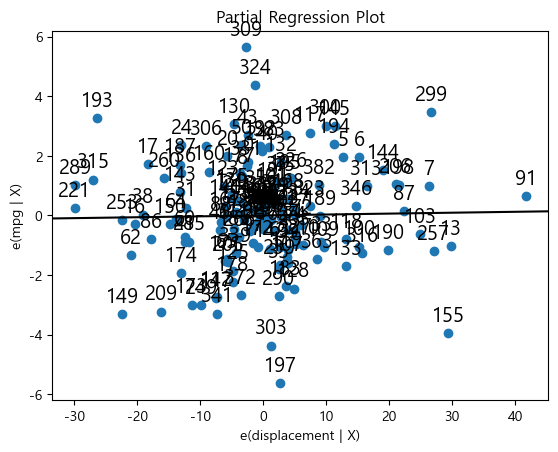

In [111]:
# 연비와 배기량간의 부분플롯회귀분석
others = list(set(df.columns).difference(set(["mpg", "displacement"])))
p, resids = sm.graphics.plot_partregress("mpg", "displacement", 
                                         others, data = df, ret_coords = True)

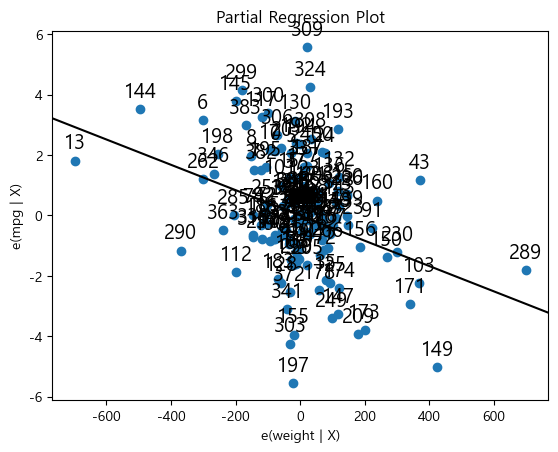

In [113]:
#연비와 무게 간의 부분 플롯 회귀 분석
others = list(set(df.columns).difference(set(["mpg", "weight"])))
p, resids = sm.graphics.plot_partregress("mpg", "weight", 
                                         others, data = df, ret_coords = True)

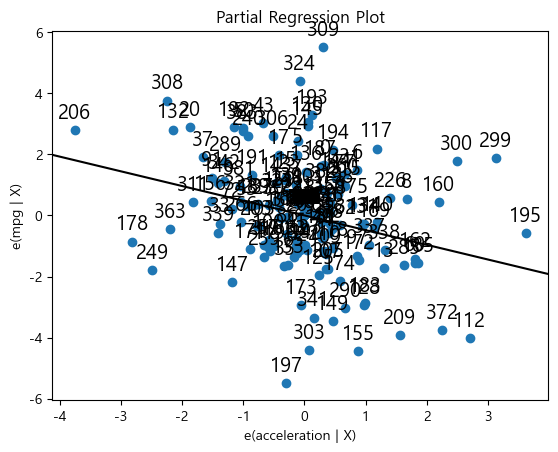

In [115]:
# 연비와 가속성능간의 부분플롯회귀분석
others = list(set(df.columns).difference(set(["mpg", "acceleration"])))
p, resids = sm.graphics.plot_partregress("mpg", "acceleration", 
                                         others, data = df, ret_coords = True)

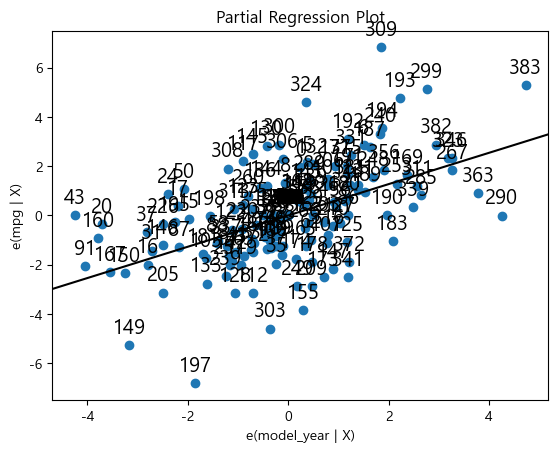

In [117]:
# 연비와 모델연도간의 부분플롯회귀분석
others = list(set(df.columns).difference(set(["mpg", "model_year"])))
p, resids = sm.graphics.plot_partregress("mpg", "model_year", 
                                         others, data = df, ret_coords = True)

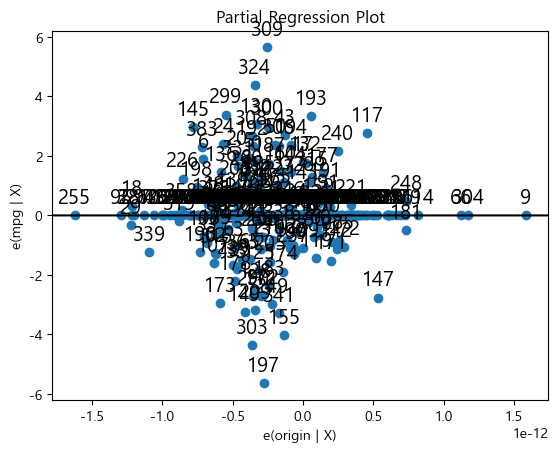

In [119]:
# 연비와 차량원산지간의 부분플롯회귀분석
others = list(set(df.columns).difference(set(["mpg", "origin"])))
p, resids = sm.graphics.plot_partregress("mpg", "origin", 
                                         others, data = df, ret_coords = True)

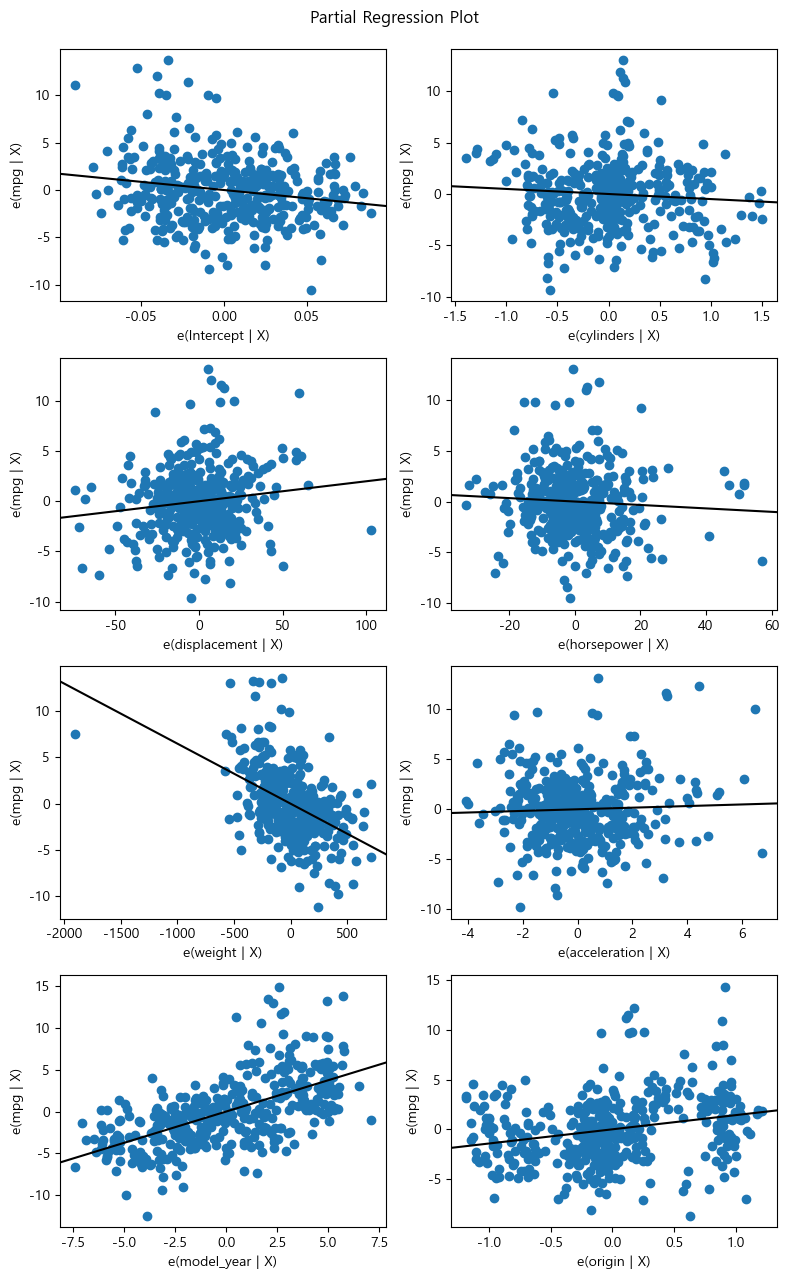

In [121]:
fig = plt.figure(figsize = (8, 13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

In [125]:
acceleration
horsepower
cylinder

AttributeError: 'DataFrame' object has no attribute 'heatmap'